# Data Scientist's Blog Post - Business Questions Answered

We have come up with a set of business questions which we will answer with help of chosen dataset. All these question are to be ansered using a subset of our dataset - US resident full-time Data Scientist.

## Exploratory Data Analysis - available as separate notebook
Please note that there is a separate notebook for exploratory data analysis of the dataset. This file is available in the folder as the current notebook.

# Business Questions
In this note, we will be dealing with a few business questions and answer them using the selected dataset. These Business Questions are:
- Q1: Does Job Satisfaction depend on Organization Type?
- Q2: Is there any correlation between Salary and Job Satisfaction?
- Q3: Does increase in Time Spent on Job Hunting indicate decline in Job Satisfaction?


## Important Points to Note
- US resident, full-time employee who work as Data Scientist were used for finding answers to the Business Questions. 
- We found similar answers for Web Developer and Mobile Developer data sets.

## Gather necessary data
In order to answer these questions we will first gather Stack Overflow Survey data.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

%matplotlib inline 

pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', None)

In [2]:
# Read data from Survey Results data file
df = pd.read_csv('./survey_results_public.csv')

df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,...,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,...,Strongly agree,Strongly agree,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning a bachelor's degree,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,"Privately-held limited company, not in startup mode",9 to 10 years,...,Strongly agree,Strongly agree,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day each week","10,000 or more employees",Publicly-traded corporation,20 or more years,...,Agree,Agree,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes writes code,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day each week","10,000 or more employees",Non-profit/non-governmental organization or private school/university,14 to 15 years,...,Agree,Strongly agree,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,"Privately-held limited company, not in startup mode",20 or more years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Determine Number of rows and columns in the dataset

In [3]:
# Number of rows and columns in the input dataset
print(f'The input data file has {df.shape[0]} rows and {df.shape[1]} columns')

The input data file has 19102 rows and 154 columns


## Perform Data Wrangling
We will create a curated dataset for answering our business questions. This would be done suitably applying some of the concets stated below:
- change column names to business friendly names
- change the data values to make suitable for presentation
- change data values for answering business questions
- add new columns with mapped data values

In [4]:
# Define a few dictionaries, to be used soon
data_name_map = {'Respondent': 'Respondent',
                 'Professional': 'Professional Type',
                 'DeveloperType': 'Developer Type',
                 'CompanyType': 'Organization Type',
                 'EmploymentStatus': 'Employment Status',
                 'Country': 'Country Name',
                 'JobSatisfaction': 'Job Satisfaction', 
                 'CareerSatisfaction': 'Career Satisfaction', 
                 'Salary': 'Salary Amount', 
                 'HoursPerWeek': 'Job Hunting Time',
                 'StackOverflowCommunity': 'Stack Overflow Community',
                 'StackOverflowHelpful': 'Stack Overflow Helpful' 
                }

job_sat_map = {"Privately-held limited company, not in startup mode": "Private Limited Company", \
               "Publicly-traded corporation": "Public Corporation", \
               "I don't know": "Unknown", \
               "Sole proprietorship or partnership, not in startup mode": "Sole Prop/Partnership", \
               "Venture-funded startup": "Venture Funded Startup", \
               "Government agency or public school/university": "Government Organization", \
               "I prefer not to answer": "Not Answered", \
               "Pre-series A startup": "Pre-Series A Startup", \
               "Non-profit/non-governmental organization or private school/university": "Non-profit/Non-Govt Org", \
               "State-owned company": "State Owned Organization", \
               "Something else": "Other Organizations"
              }

agr_lvl_map = {"Strongly disagree": 1,
               "Disagree": 2,
               "Somewhat agree": 3,
               "Agree": 4,
               "Strongly agree": 5
              }


In [5]:
# Create new dataset - Job Satisfaction dataset
js_df = df[['Professional', 'DeveloperType', 'CompanyType', 'EmploymentStatus', 'Country','JobSatisfaction', \
            'CareerSatisfaction', 'Salary', 'HoursPerWeek', 'StackOverflowCommunity', 'StackOverflowHelpful']].copy()
# Rename columns
js_df.rename(columns=data_name_map, inplace=True)


In [6]:
# Manual check
js_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19102 entries, 0 to 19101
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Professional Type         19102 non-null  object 
 1   Developer Type            13772 non-null  object 
 2   Organization Type         14609 non-null  object 
 3   Employment Status         19102 non-null  object 
 4   Country Name              19102 non-null  object 
 5   Job Satisfaction          15253 non-null  float64
 6   Career Satisfaction       16102 non-null  float64
 7   Salary Amount             5009 non-null   float64
 8   Job Hunting Time          7721 non-null   float64
 9   Stack Overflow Community  12064 non-null  object 
 10  Stack Overflow Helpful    12542 non-null  object 
dtypes: float64(4), object(7)
memory usage: 1.6+ MB


In [7]:
# Map Organization Type and Stack Overflow Community to shorter/suitable values
js_df.replace({"Organization Type": job_sat_map}, inplace=True)
js_df.replace({"Stack Overflow Community": agr_lvl_map}, inplace=True)
js_df.replace({"Stack Overflow Helpful": agr_lvl_map}, inplace=True)
# Cleanup the dataframe
js_df.dropna(axis=0)
js_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19102 entries, 0 to 19101
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Professional Type         19102 non-null  object 
 1   Developer Type            13772 non-null  object 
 2   Organization Type         14609 non-null  object 
 3   Employment Status         19102 non-null  object 
 4   Country Name              19102 non-null  object 
 5   Job Satisfaction          15253 non-null  float64
 6   Career Satisfaction       16102 non-null  float64
 7   Salary Amount             5009 non-null   float64
 8   Job Hunting Time          7721 non-null   float64
 9   Stack Overflow Community  12064 non-null  float64
 10  Stack Overflow Helpful    12542 non-null  float64
dtypes: float64(6), object(5)
memory usage: 1.6+ MB


## Find Correlation between Job Satisfaction and other numerical columns
We observe here that Job Satisfaction and Career Satisfaction are strongly correlated. Since they are very similar concepts, we will be focusing on Job Satisfaction (and ignore Career Satisfaction) and find it's association with other data. 

From the heatmap below, we get a general sense of how different numerical columns are correlated to each other. We also take this opportunity to normalize the column names.

Later, in this notebook, we will be addressing business questions raised above.

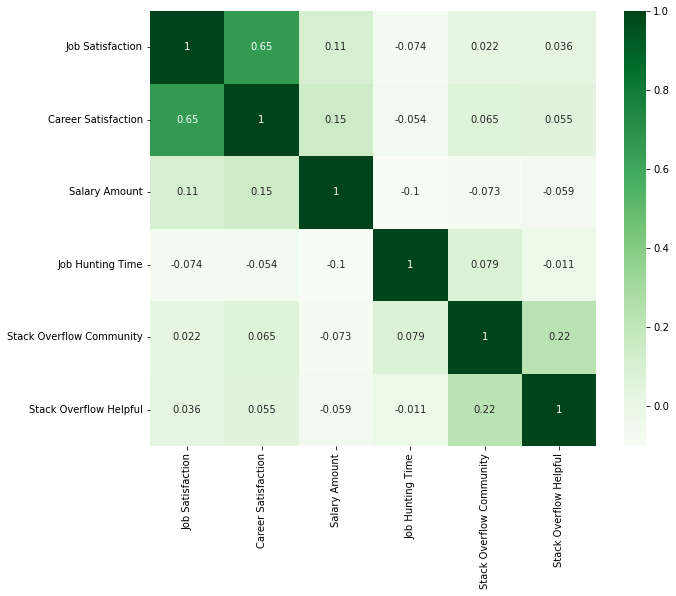

In [8]:
# Correlation between Job Satisfaction, Career Satisfaction, Salary amount, Job Hunting Time, 
# Stack Overflow Community and Stack Overflow Helpful

corr = js_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='Greens', annot=True);  


## Helper Functions

In [9]:
def filter_and_serve_bar(df, pattern):
    """
    Prepare data and draw bar plot for chosen pattern (e.g., Data scientist)
    INPUT
    - df - pandas dataframe contining data
    - pattern - value for 'Developertype' column, possible values are: 
    -          'Data scientist', 'Web developer', 'Mobile developer'
    OUTPUT
    - None
    """
    mask = df[['Developer Type']].apply(lambda col:col.str.contains(pattern, na=False, case=False)).any(axis=1)
    fin_df = df[mask].loc[(df['Employment Status']=='Employed full-time') & \
                          (df['Country Name']=='United States') & \
                          (df['Organization Type'] != 'Not Answered') & \
                          (df['Organization Type'] != 'Unknown')] \
                        [['Organization Type', 'Job Satisfaction']].dropna(axis=0) 

    sum_df = fin_df.dropna(axis=0).groupby(["Organization Type"]).mean() \
             .sort_values(by='Job Satisfaction', axis=0, ascending=False)  
    
    sum_df.plot(kind='bar');
    plt.title('Job Satisfaction - ' + pattern)
    
    return sum_df.round({'Job Satisfaction': 1})
    

## Q1: Does Job Satisfaction depend on Organization Type?
- Identify top five Organization Types that exhibit hiest level of Job Satisfaction among employees.
- Note: Only US resident full-time Data Scientists data to be used for answering this question. 

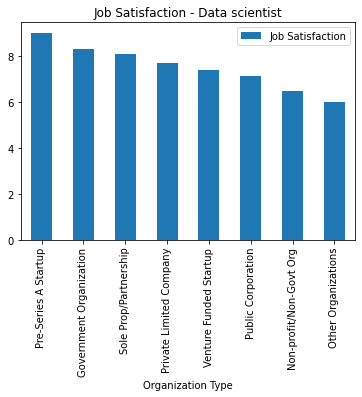

In [10]:
sum_df = filter_and_serve_bar(js_df, 'Data scientist')

## Q1 Answers

In [11]:
print('From the bar plot above it is clear that Job Satisfaction varies significantly by Organization Types.', \
'Organization Types with their average Job Satisfaction Ratings for US based full-time Data Scientists are shown here:\n')
print(sum_df.to_csv(header=None, sep='\t'))


From the bar plot above it is clear that Job Satisfaction varies significantly by Organization Types. Organization Types with their average Job Satisfaction Ratings for US based full-time Data Scientists are shown here:

Pre-Series A Startup	9.0
Government Organization	8.3
Sole Prop/Partnership	8.1
Private Limited Company	7.7
Venture Funded Startup	7.4
Public Corporation	7.1
Non-profit/Non-Govt Org	6.5
Other Organizations	6.0



## Q2: Is there any correlation between Salary and Job Satisfaction?
Note: Only US resident full-time Data Scientists data to be used for answering this question.

In [12]:
# Gather data necessary for answering Q2 and Q3
cols_to_check = ['Developer Type']
pattern = 'Data scientist'
mask = js_df[cols_to_check].apply(
    lambda col:col.str.contains(
    pattern, na=False, case=False)).any(axis=1)

js_df = js_df[mask].loc[(js_df['Employment Status']=='Employed full-time') & (js_df['Country Name']=='United States')] \
        [['Job Satisfaction', 'Salary Amount', 'Job Hunting Time']].copy();


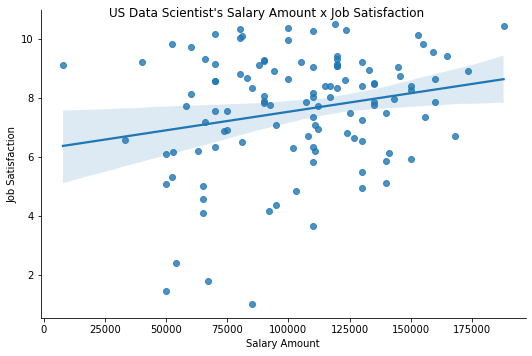

In [13]:
# Draw a scatter plot with a regression line
# Scatter plot with trend line between Job Hunting Hours/week and Job Satisfaction
sl_df = js_df[['Salary Amount', 'Job Satisfaction']]

corr = sl_df.corr()

sl_df.dropna(axis=0)
plot = sns.lmplot(x='Salary Amount', y='Job Satisfaction', data=sl_df, aspect=1.5, fit_reg=True, y_jitter=.5);
plot.fig.suptitle("US Data Scientist's Salary Amount x Job Satisfaction");


## Q2 Answers

In [14]:
# Correlation matrix between Salary and Job Satisfaction
corr_cf = corr['Salary Amount']['Job Satisfaction']
if corr_cf < 0.0:
    text_1 = 'negatively'
else:
    text_1 = 'positively'
    
print("From the scatter plot with regression line, we can say that US Data Scientist's", \
      "Job Hunting Time per week and Job Satisfaction are", text_1, "correlated.\n")
print("Correlation coefficient = ", str(round(corr_cf, 3)))
      

From the scatter plot with regression line, we can say that US Data Scientist's Job Hunting Time per week and Job Satisfaction are positively correlated.

Correlation coefficient =  0.222


## Q3: Does increase in Job Hunting Time indicate decline in Job Satisfaction?
Note: Only US resident full-time Data Scientists data to be used for answering this question.

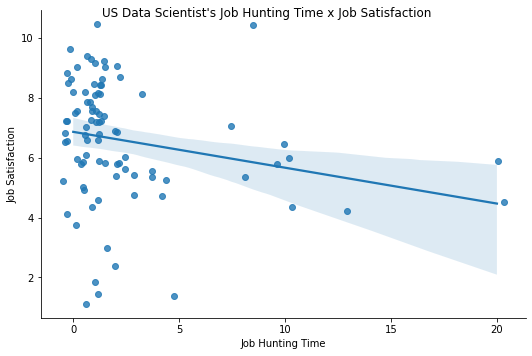

In [15]:
# Scatter plot with trend line between Job Hunting Hours/week and Job Satisfaction
hw_df = js_df[['Job Hunting Time', 'Job Satisfaction']]

corr2 = hw_df.corr()

hw_df.dropna(axis=0)
plot2 = sns.lmplot(x='Job Hunting Time', y='Job Satisfaction', data=hw_df, aspect=1.5, fit_reg=True, \
                   x_jitter=0.5, y_jitter=0.5);  
plot2.fig.suptitle("US Data Scientist's Job Hunting Time x Job Satisfaction");


## Q3 Answers

In [16]:
corr_cf = corr2['Job Hunting Time']['Job Satisfaction']
if corr_cf < 0.0:
    text_1 = 'negatively'
else:
    text_1 = 'positively'
    
print("From the scatter plot with regression line, we can say that US Data Scientist's", \
      "Job Hunting Time per week and Job Satisfaction are", text_1, "correlated.\n")
print("Correlation coefficient = ", str(round(corr_cf, 3)))

From the scatter plot with regression line, we can say that US Data Scientist's Job Hunting Time per week and Job Satisfaction are negatively correlated.

Correlation coefficient =  -0.225


## End of notebook